In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter
pd.set_option("display.max_columns", 30)
pd.set_option("display.max_colwidth", 50)

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(10002, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         10002 non-null  object 
 1   Release_year       0 non-null      float64
 2   Director           9992 non-null   object 
 3   Cast               9945 non-null   object 
 4   Average_rating     9421 non-null   float64
 5   Owner_rating       967 non-null    float64
 6   Genres             9978 non-null   object 
 7   Runtime            9992 non-null   float64
 8   Countries          9884 non-null   object 
 9   Original_language  9999 non-null   object 
 10  Spoken_languages   9999 non-null   object 
 11  Description        10000 non-null  object 
 12  Studios            9695 non-null   object 
 13  Watches            10002 non-null  int64  
 14  List_appearances   10002 non-null  int64  
 15  Likes              10002 non-null  int64  
 16  Fans               100

In [5]:
df.drop(columns=["Cast","Owner_rating","Countries","Spoken_languages","½","★½","★★","★★½","★★★½","★★★★","★★★★½","Film_URL","Release_year","List_appearances"],inplace=True)

In [6]:
df=df.rename(columns={"★":"Lowest★","★★★":"Medium★★★","★★★★★":"Highest★★★★★"})

In [7]:
df.shape

(10002, 15)

In [8]:
df.isna().sum()

Film_title             0
Director              10
Average_rating       581
Genres                24
Runtime               10
Original_language      3
Description            2
Studios              307
Watches                0
Likes                  0
Fans                   0
Lowest★                0
Medium★★★              0
Highest★★★★★           0
Total_ratings          0
dtype: int64

In [9]:
x=df["Studios"].value_counts().reset_index()
x
df["Studios"]=df["Studios"].fillna("Unknown")
df["Average_rating"].mean()
df["Average_rating"]=df["Average_rating"].fillna(df["Average_rating"].mean())
df["Runtime"]=df["Runtime"].fillna(df["Runtime"].mean())
df["Genres"]=df["Genres"].fillna("Unknown")
df.dropna(subset=["Description"],inplace=True)
df["Original_language"]=df["Original_language"].fillna("Unknown")
df["Director"]=df["Director"].fillna("Unknown")

In [10]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

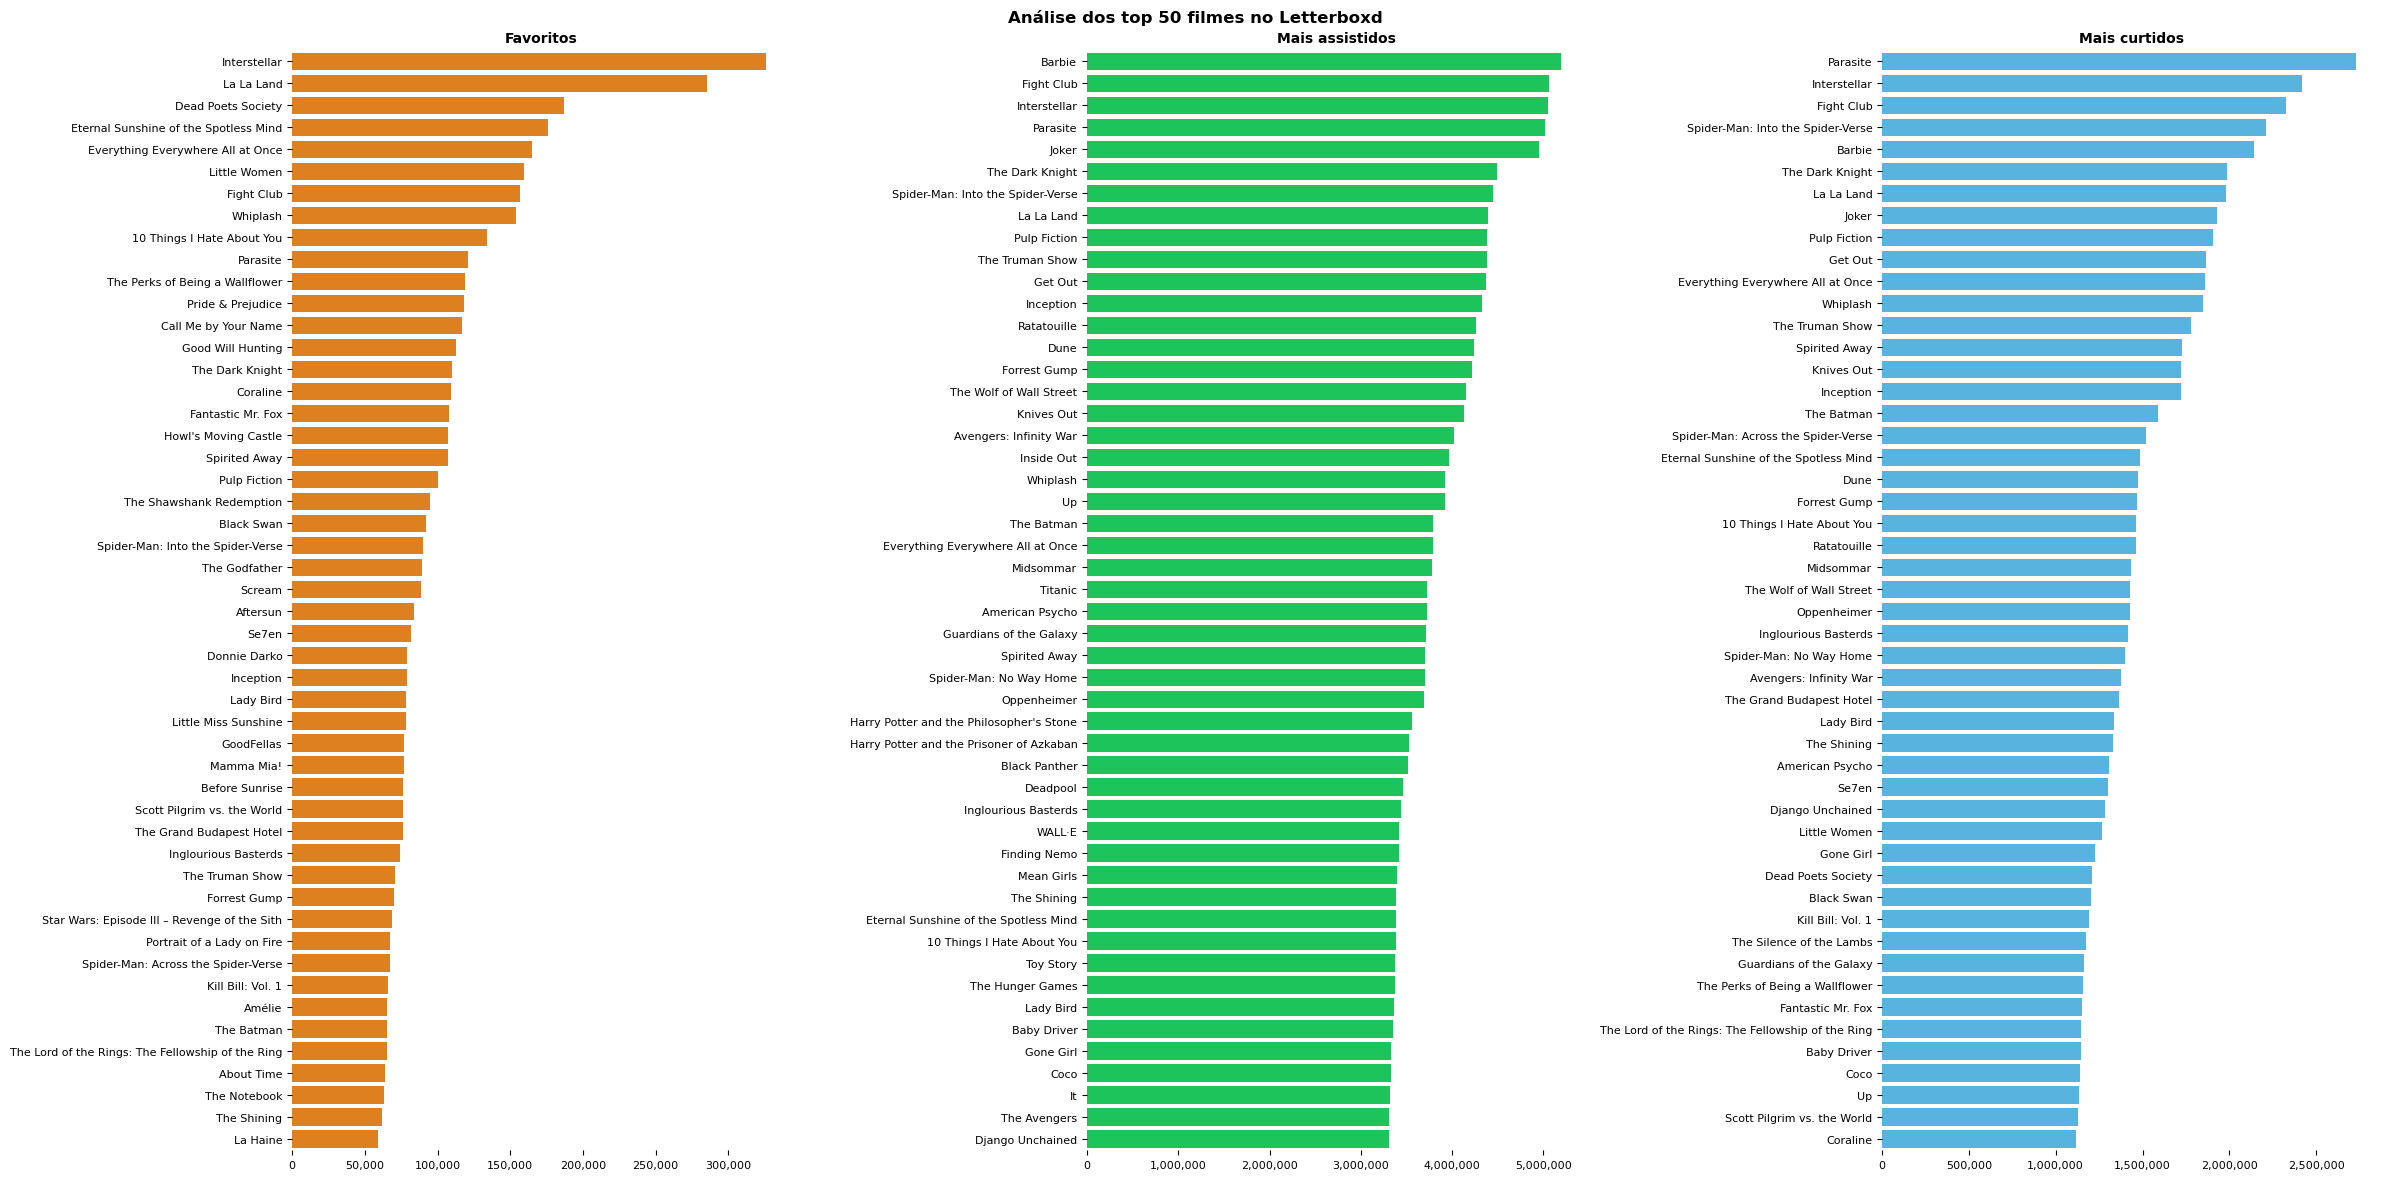

In [12]:
classifi_ge = df.groupby("Film_title")["Fans"].sum().nlargest(50).reset_index()
classfi_mov = df.groupby("Film_title")["Watches"].sum().nlargest(50).reset_index()
classfi_li = df.groupby("Film_title")["Likes"].sum().nlargest(50).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(24, 12))

fig.suptitle("Análise dos top 50 filmes no Letterboxd", fontsize=12, fontweight="bold")

sns.barplot(data=classifi_ge, x="Fans", y="Film_title", color="#ff8000", ax=axes[0])
axes[0].set_title("Favoritos", fontsize=10, fontweight="bold")
axes[0].set_xlabel("", fontsize=8)
axes[0].set_ylabel("", fontsize=8)
axes[0].tick_params(axis='y', labelsize=8)
axes[0].tick_params(axis='x', labelsize=8)

sns.barplot(data=classfi_mov, x="Watches", y="Film_title", color="#00e054", ax=axes[1])
axes[1].set_title("Mais assistidos", fontsize=10, fontweight="bold")
axes[1].set_xlabel("", fontsize=8)
axes[1].set_ylabel("", fontsize=8)
axes[1].tick_params(axis='y', labelsize=8)
axes[1].tick_params(axis='x', labelsize=8)

sns.barplot(data=classfi_li, x="Likes", y="Film_title", color="#40bcf4", ax=axes[2])
axes[2].set_title("Mais curtidos", fontsize=10, fontweight="bold")
axes[2].set_xlabel("", fontsize=8)
axes[2].set_ylabel("", fontsize=8)
axes[2].tick_params(axis='y', labelsize=8)
axes[2].tick_params(axis='x', labelsize=8)

for ax in axes:
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.ticklabel_format(style='plain', axis='x')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()